In [155]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

In [2]:
total = 50

In [5]:
points = []

for red in range(1, 50):
    blue = total - red
    
    entropy = - red/total * np.log(red/total) - blue/total * np.log(blue/total) 
    
    points.append(entropy)

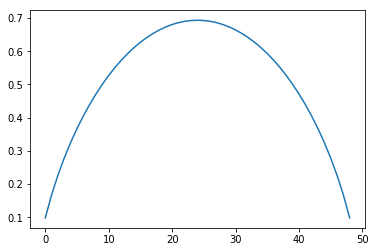

In [6]:
plt.plot(points)

In [7]:
def entropy(nums):
    _, counts = np.unique(nums, return_counts=True)
    probab = counts / len(nums)
    
    return -(np.log2(probab) * probab).sum()

In [10]:
entropy([1, 1, 2, 2])

1.0

In [48]:
df = pd.read_csv("../datasets/titanic/train.csv")

In [49]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [51]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [52]:
data = df[['Survived', 'Pclass','Sex', 'Age', 'SibSp', 'Parch']]

In [53]:
data.groupby(["Pclass"]).mean()

,Survived,Age,SibSp,Parch
Pclass,,,,
1,0.629630,38.233441,0.416667,0.356481
2,0.472826,29.877630,0.402174,0.380435
3,0.242363,25.140620,0.615071,0.393075


In [54]:
data.groupby(["Pclass", "Survived"]).mean()

Age     SibSp     Parch
Pclass Survived                               
1      0         43.695312  0.287500  0.300000
       1         35.368197  0.492647  0.389706
2      0         33.544444  0.319588  0.144330
       1         25.901566  0.494253  0.643678
3      0         26.555556  0.672043  0.384409
       1         20.646118  0.436975  0.420168

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 41.8+ KB


In [56]:
data["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5       NaN
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17      NaN
18     31.0
19      NaN
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26      NaN
27     19.0
28      NaN
29      NaN
       ... 
861    21.0
862    48.0
863     NaN
864    24.0
865    42.0
866    27.0
867    31.0
868     NaN
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
878     NaN
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [57]:
data["Age"] = data["Age"].fillna(data["Age"].mean())

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 41.8+ KB


In [60]:
# data["Age"].fillna

In [61]:
le = LabelEncoder()

In [62]:
le.fit(data["Sex"])

LabelEncoder()

In [63]:
le.classes_

array(['female', 'male'], dtype=object)

In [47]:
np.unique(data["Sex"])

array([0, 1])

In [65]:
data["Sex"] = le.transform(data["Sex"])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
dtypes: float64(1), int64(5)
memory usage: 41.8 KB


In [67]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch'], dtype='object')

In [69]:
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]
y = data['Survived']

In [157]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [140]:
class DecisionTreeCustom:
    
    def __init__(self, max_depth = 5):
        self.max_depth = max_depth
    
    def fit(self, X, y):
        self.root = self.make_tree(X, y, depth = 0)
    
    def make_tree(self, X, y, depth):
        
        if (depth > self.max_depth):
            node = Node(result = y.mean())
            return node
        
        gains = []
        for column in X.columns:
            gain = self.infogain(column, X, y)
            gains.append((gain, column))
        
        best_gain, best_col = sorted(gains)[-1]
        
        if (best_gain <= 0):
            node = Node(result = y.mean())
            return node
        
        mean = X[best_col].mean()
        X_left = X.loc[X[best_col] <= mean]
        X_right = X.loc[X[best_col] > mean]
        
        y_left = y.loc[X[best_col] <= mean]
        y_right = y.loc[X[best_col] > mean]
        
        node = Node(col = best_col, value = mean)
        node.left = self.make_tree(X_left, y_left, depth+1)
        node.right = self.make_tree(X_right, y_right, depth+1)
        
        return node

    
    def infogain(self, column, X, y):
        mean = X[column].mean()
        y_left = y.loc[X[column] <= mean]
        y_right = y.loc[X[column] > mean]
        
        e_left = len(y_left)/len(y) * entropy(y_left)
        e_right = len(y_right)/len(y) * entropy(y_right)
        
        return entropy(y) -  e_left - e_right
    
    def entropy(self, nums):
        _, counts = np.unique(nums, return_counts=True)
        probab = counts / len(nums)

        return -(np.log2(probab) * probab).sum()
    
    def predict(self, X):
        
        result = []
        for _, row in X.iterrows():
            result.append(self.predict_point(self.root, row))
            
        return (np.array(result) > .5).astype(int)

    def predict_point(self, node, row):
        if node.col == None:
            return node.result
        
        if node.value > row[node.col]:
            return self.predict_point(node.left, row)
        else:
            return self.predict_point(node.right, row)
        
    def score(self, X, y):
        out = self.predict(X)
        return (y == out).mean()
            
    
    

class Node:
    
    def __init__(self, col=None, value=None, result=None):
        
        self.col = col
        self.value = value
        self.result = result
        
        self.left = None
        self.right = None

In [163]:
model = DecisionTreeCustom(14)

In [164]:
model.fit(X_train, y_train)

In [165]:
model.predict(X.iloc[:10])

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1])

In [166]:
model.score(X_test, y_test)

0.7796610169491526

In [168]:
model.score(X_train, y_train)

0.9093959731543624

In [169]:
from sklearn.tree import DecisionTreeClassifier

In [171]:
from sklearn.ensemble import RandomForestClassifier


In [174]:
model = RandomForestClassifier()

In [175]:
model.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [176]:
model.score(X_test, y_test)

0.8271186440677966

In [177]:
X.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch'], dtype='object')

In [179]:
# model.score(X_test[['Pclass', 'Sex', 'Age', 'SibSp']], y_test)